<a href="https://colab.research.google.com/github/SaifAlmaliki/Video-Game-Sales-Prediction/blob/main/Video_game_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read CSV file
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# using Label Encoder to convert categorical data  into numerical data
to_numric = LabelEncoder()

df['Platform']  = to_numric.fit_transform(df['Platform'].astype('str'))
df['Genre']     = to_numric.fit_transform(df['Genre'].astype('str'))
df['Publisher'] = to_numric.fit_transform(df['Publisher'].astype('str'))



In [4]:
# Rank, Name and Year are not important fields in our prediction ==> drop them
df_drop = df.drop(['Rank', 'Name', 'Year'], axis=1)

# Only EU_Sales field is important in prediction Global Sales ==> drop other price fields
df_more_drop = df_drop.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

# Most importnt columns in our prediction
columns = ['Platform', 'Genre', 'Publisher', 'NA_Sales', "EU_Sales"]

y = df['Global_Sales'].values
x = df[list(columns)].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scalar = StandardScaler()

# apply fit only on training data
scalar.fit(x_train)

# apply scaling on training and test data
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

**Apply Linear Regression**

In [5]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
train_accuracy = reg.score(x_train, y_train)
print("Linear Regression Accuracy for train data = ", train_accuracy *100, '%')

test_accuracy = reg.score(x_test, y_test)
print("Linear Regression Accuracy for test data = ", test_accuracy *100, '%')

Linear Regression Accuracy for train data =  97.10812694931442 %
Linear Regression Accuracy for test data =  94.18835193289462 %


Apply **GradientBoostingRegressor**

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
model1 = GradientBoostingRegressor()
model1.fit(x_train, y_train)


train_accuracy = model1.score(x_train, y_train)
print("GradientBoostingRegressor Accuracy for train data = ", train_accuracy *100, '%')

test_accuracy = model1.score(x_test, y_test)
print("GradientBoostingRegressor Accuracy for test data = ", test_accuracy *100, '%')

GradientBoostingRegressor Accuracy for train data =  98.59208768904634 %
GradientBoostingRegressor Accuracy for test data =  95.23123830476912 %


Apply **DecisionTreeRegressor**

In [7]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)


train_accuracy = model2.score(x_train, y_train)
print("DecisionTreeRegressor Accuracy for train data = ", train_accuracy *100, '%')

test_accuracy = model2.score(x_test, y_test)
print("DecisionTreeRegressor Accuracy for test data = ", test_accuracy *100, '%')

DecisionTreeRegressor Accuracy for train data =  99.79916625832415 %
DecisionTreeRegressor Accuracy for test data =  92.17373705687201 %


Appl **RandomForestRegressor**

In [8]:
from sklearn.ensemble import RandomForestRegressor
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)


train_accuracy = model3.score(x_train, y_train)
print("RandomForestRegressor Accuracy for train data = ", train_accuracy *100, '%')

test_accuracy = model3.score(x_test, y_test)
print("RandomForestRegressor Accuracy for test data = ", test_accuracy *100, '%')

RandomForestRegressor Accuracy for train data =  99.79916625832415 %
RandomForestRegressor Accuracy for test data =  91.91960287377539 %


Appl **SVR**

In [9]:
from sklearn.svm import SVR
model4 = DecisionTreeRegressor()
model4.fit(x_train, y_train)


train_accuracy = model4.score(x_train, y_train)
print("SVR Accuracy for train data = ", train_accuracy *100, '%')

test_accuracy = model4.score(x_test, y_test)
print("SVR Accuracy for test data = ", test_accuracy *100, '%')

SVR Accuracy for train data =  99.79916625832415 %
SVR Accuracy for test data =  91.62510325910368 %


Appl **KNeighborsRegressor**

In [10]:
from sklearn.neighbors import KNeighborsRegressor
model5 = DecisionTreeRegressor()
model5.fit(x_train, y_train)


train_accuracy = model5.score(x_train, y_train)
print("KNeighborsRegressor Accuracy for train data = ", train_accuracy *100, '%')

test_accuracy = model5.score(x_test, y_test)
print("KNeighborsRegressor Accuracy for test data = ", test_accuracy *100, '%')

KNeighborsRegressor Accuracy for train data =  99.79916625832415 %
KNeighborsRegressor Accuracy for test data =  90.85230906481661 %


Apply **Deep Learning**

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


In [22]:
# Build NN
model = Sequential()

model.add(Dense(x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

Epoch 1/500
91/91 [==============================] - 0s 3ms/step - loss: 0.7482 - val_loss: 0.2313
Epoch 2/500
91/91 [==============================] - 0s 2ms/step - loss: 0.3444 - val_loss: 0.1974
Epoch 3/500
91/91 [==============================] - 0s 2ms/step - loss: 0.2376 - val_loss: 0.1512
Epoch 4/500
91/91 [==============================] - 0s 2ms/step - loss: 0.2860 - val_loss: 0.1452
Epoch 5/500
91/91 [==============================] - 0s 2ms/step - loss: 0.5581 - val_loss: 0.1655
Epoch 6/500
91/91 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1293
Epoch 7/500
91/91 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.0958
Epoch 8/500
91/91 [==============================] - 0s 2ms/step - loss: 0.5192 - val_loss: 0.1318
Epoch 9/500
91/91 [==============================] - 0s 2ms/step - loss: 0.4334 - val_loss: 0.6341
Epoch 10/500
91/91 [==============================] - 0s 2ms/step - loss: 0.3850 - val_loss: 0.1617
Epoch 11/

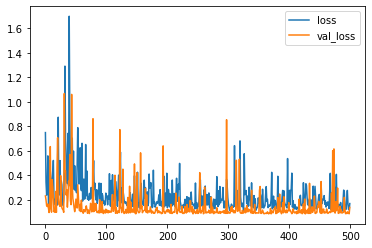

In [24]:
model.compile(optimizer=Adam(0.01), loss='mse')

model.fit(x=x_train, y=y_train,
          validation_data=(x_test, y_test),
          batch_size=128,
          epochs=500)

losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
prediction = model.predict(x_test)
print("Deep Learning: ")
print("mean_absolute_error: " , mean_absolute_error(y_test, prediction))
print("mean_squared_error: " ,  np.sqrt(mean_squared_error(y_test, prediction)))
print("explained_variance_score: " , explained_variance_score(y_test, prediction))
print("r2_score: " , r2_score(y_test, prediction))

Deep Learning: 
mean_absolute_error:  0.17610815217432726
mean_squared_error:  0.3711860091080061
explained_variance_score:  0.9179134472659382
r2_score:  0.9152079065380541
